# <font color = "green"> Projeto de Machine Learning de ínicio ao Fim </font>

Versão linguagem Python:

In [1]:
from platform import python_version
print("Versão Python", python_version())

Versão Python 3.9.13


Se requer a versão mais recente de `Scikit-learn`:

In [2]:
#  !pip install --upgrade scikit-learn


Se requer a versão mais recente `threadpoolctl`:

In [3]:
# !pip install --upgrade threadpoolctl

Versão Scikit-learn:

In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


Librerias e funções:

In [5]:
from pathlib import Path
import urllib.request    
import tarfile           
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obter dados

In [6]:
def dados_alojamento():   
    Path("datasets").mkdir(parents=True, exist_ok=True)          # cria a pasta "datasets" com os pais necessários
    tarball_path = Path("datasets/housing.tgz")                  # caminho do arquivo segundo sistema operativo     
    url = "https://github.com/ageron/data/raw/main/housing.tgz"  # string contendo a url dos dados
    urllib.request.urlretrieve(url, tarball_path)                # Descarga o arquivo url e o salva com o nome de tarball_path
    with tarfile.open(tarball_path) as housing_tarball:          # abre o arquivo em tarball_path e guarda no objeto housing_tarball
        housing_tarball.extractall(path="datasets")              # extrai todos os aquivos criando a pasta housing no direitorio datasets 
    return pd.read_csv(Path("datasets/housing/housing.csv"))     # abre todos o arquivo de dados

alojamento = dados_alojamento()                                  # carrega os dados

# Análises Descritiva

In [7]:
# Dados
alojamento.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Estrutura dos dados
alojamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Verificacao de valores ausentes
alojamento.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# Resumo variável `ocean_proximity`
alojamento.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# Resumo descritivo
alojamento.describe(percentiles=[.25, .5, .75, .99])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
99%,-116.290000,40.626100,52.000000,11212.110000,2221.360000,5805.830000,1982.660000,10.596540,500001.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


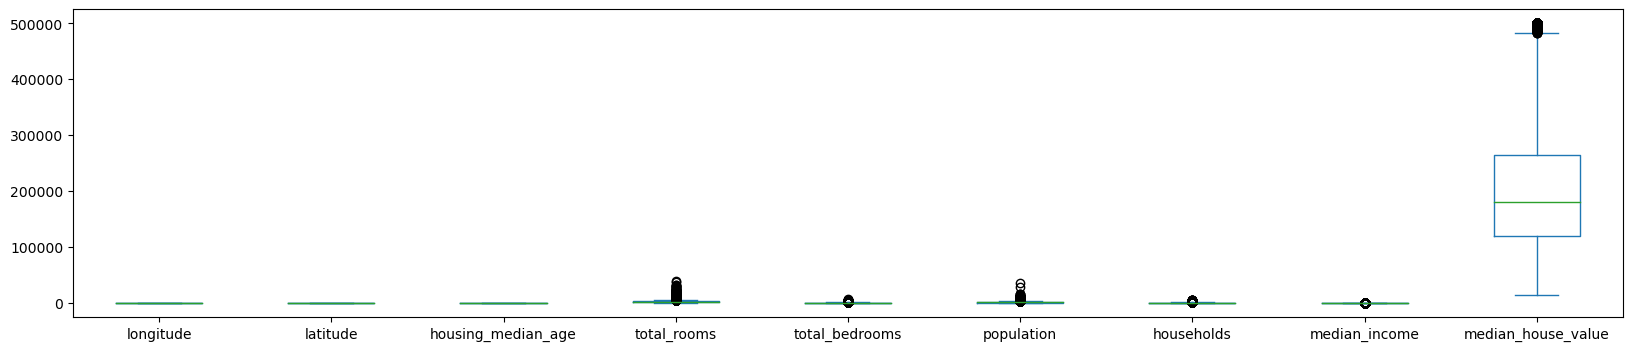

In [12]:
# Box-plots
fig, axs = plt.subplots(figsize=(20, 4))
alojamento.plot.box(ax=axs)                   
plt.show()  

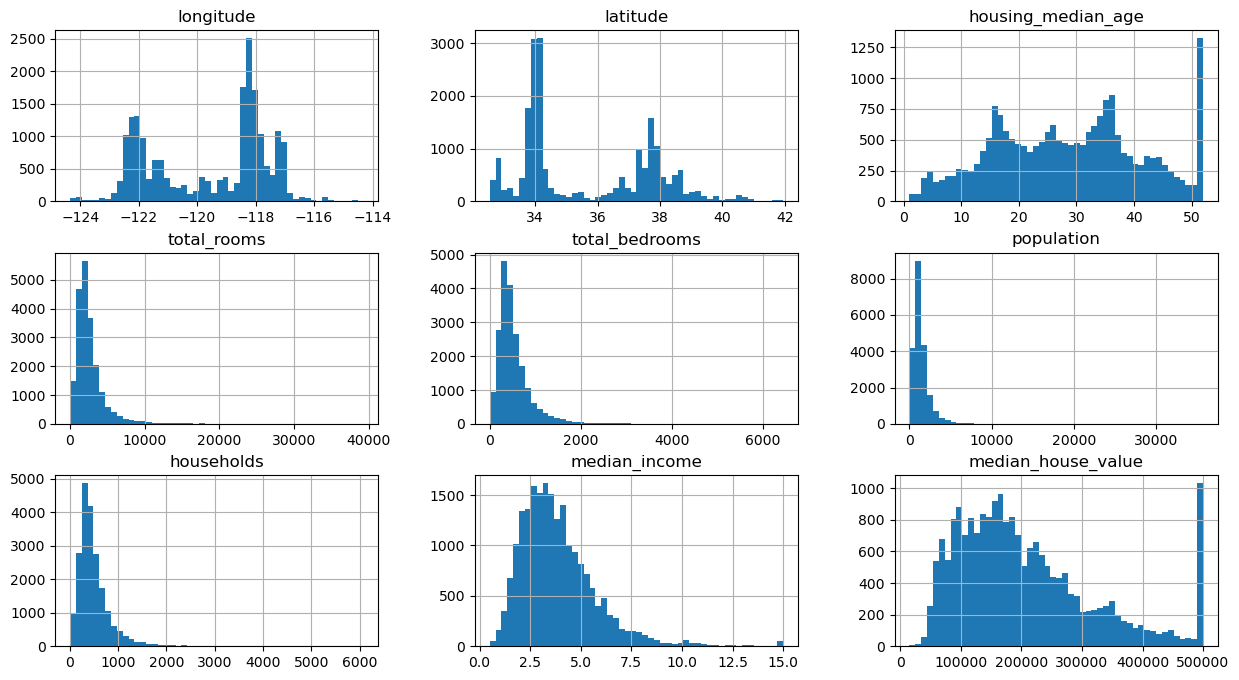

In [13]:
# Histogramas 
alojamento.hist(bins = 50, figsize=(15, 8))
plt.show()

> *Conclusões da análises descritiva*

- Apenas o campo `total_bedrooms` contém *NaN*, em total $207$ valores ausentes.
- A variável `median_income` se encontra escalado.
- Apenas o campo `ocean_proximity` é categórico (nominal), onde o nível `ISLAND` contém apenas $5$ instâncias. 
- No Box-plot se observa que os recursos numéricos estão em escalas diferentes. Se pode precisar uma padronização dos dados, com excepção dos campos `longitude` e `latitude` que podem sugerir uma abordagem diferente. 
- No Box-plot a excepção dos campos `longitude`, `latitude` e `housing_median_age`, as variáveis presentam *outlier*. No entanto, como os valores são consistentes não se excluem.
- No histograma se observa que a excepção da variável `housing_median_age`, as variáveis apresentam assimetria positiva com cauda pesadas, o que sugere uma transformação `log` antes da padronização. Logo o campo `housing_median_age` é simétrico com três modas, o que indica uma padronização. 

# Conjunto de Treinamento e Teste

> Quando amostra é suficientemente grande (especialmente em relação ao número de atributos) e não se tem uma preditor importante, seja teóricamente ou por opinião de especialista, para prever `Y` que requera que o conjunto de teste seja representativo das categorias desse preditor. Se podem obter aleatóriamente os conjuntos de treinamento e teste. 

In [14]:
# Importa-se a função `train_test_split`
from sklearn.model_selection import train_test_split

In [15]:
# Conjunto train e teste: amostra aleatório
trainSet, testSet = train_test_split(alojamento, test_size = 0.2, random_state = 42)

In [16]:
print("Número de registros do conjunto train:", len(trainSet))
print("Número de registros do conjunto test:", len(testSet))

Número de registros do conjunto train: 16512
Número de registros do conjunto test: 4128


> Quando amostra não é suficientemente grande (especialmente em relação ao número de atributos) ou mesmo sendo grande se tem uma preditor importante, seja teóricamente ou por opinião de especialista, para prever `Y` que requera que *o conjunto de teste* seja representativo das categorias desse preditor. Se pode obter estratíficadamente os conjuntos de treinamento e teste.

> Suponha que para nossos dados os especialistas disseram que a variável `median_income` é muito importante para prever `median_house_value`, assim se deseja que o conjunto teste seja uma representação dela. Como `median_income` é uma variável continua se categoriza ordinalmente.

In [17]:
# Quantiles da variável `median_income`
alojamento.median_income.quantile([.25, .5, .75])

0.25    2.56340
0.50    3.53480
0.75    4.74325
Name: median_income, dtype: float64

In [18]:
# Categorização ordinal da variável `median_income`
alojamento["income_cat"] = pd.cut(alojamento["median_income"], 
                                  bins=[0., 2.57, 3.53, 4.74, np.inf],
                                  labels=[1, 2, 3, 4])

In [19]:
# Conjunto train e teste: amostra estratíficada
strat_trainSet, strat_testSet = train_test_split(alojamento, test_size=0.2, 
                                                 stratify=alojamento["income_cat"], 
                                                 random_state=42)

In [20]:
print("Número de registros do conjunto train:", len(strat_trainSet))
print("Número de registros do conjunto test:", len(strat_testSet))

Número de registros do conjunto train: 16512
Número de registros do conjunto test: 4128


In [21]:
# taxa de prevalencia de cada estrato ordinal na variável `income_cat` em `testSet`
strat_testSet.income_cat.value_counts() / len(strat_testSet)

1    0.252180
3    0.250969
4    0.250484
2    0.246366
Name: income_cat, dtype: float64

In [22]:
# Como não se usará a variável `income_cat` se elimina, pois apenas se usa para tomar amostras estratificadas. 
for set_ in (strat_testSet, strat_trainSet):
 set_.drop("income_cat", axis=1, inplace=True)

## Explorar e Visualizar o Conjunto Treinamento para Obter Insights

> Tenha em consideração:

- Se o conjunto de treinamento for muito grande, convém amostrar um conjunto de exploração para tornar as manipulações fáceis e rápidas durante a fase de exploração.

- Nesse caso, o conjunto de treinamento é relaltivamente pequeno, então se pode trabalhar diretamente no conjunto completo. 

- Faça uma cópia do conjunto de treinamento original, para que possa revertê-lo posteriormente, pois faz varias transformações.

- O autor Aurelio reescribe o objeto que contém o conjunto de dados completo pela cópia do conjunto de treinamento. Pois o foco passa estar no conjunto de treinamento, por enquanto. 

In [23]:
# copia do conjunto de treinamento original
strat_trainSet_copy = strat_trainSet.copy()

### Visualizando dados geográficos
Porque o conjunto de dados inclui informações geográficas (latitude e longitude), é uma boa ideia criar um gráfico de dispersão de todos os distritos para visualizar os dados.

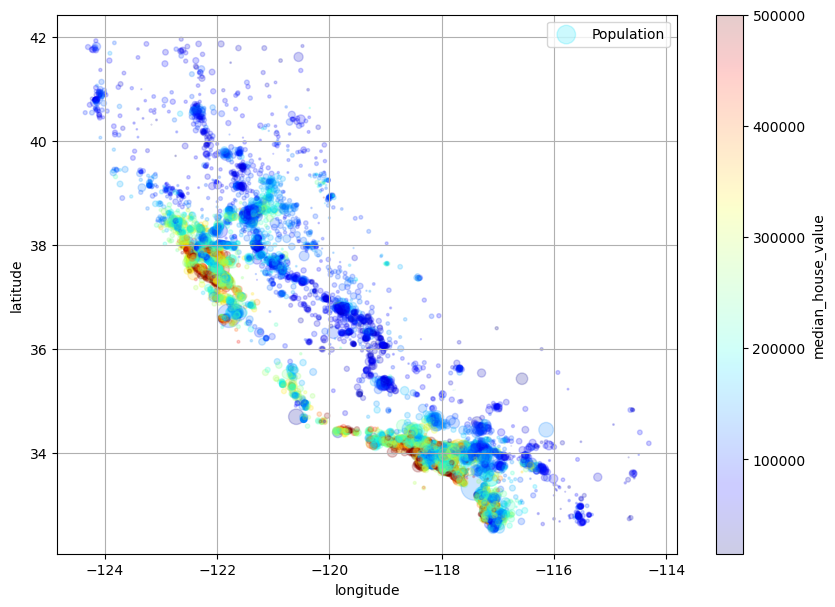

In [24]:
strat_trainSet_copy.plot.scatter(x = "longitude", y = "latitude", grid = True, alpha = 0.2,
                                s = strat_trainSet_copy.population / 100, label = "Population", 
                                c = "median_house_value", cmap = "jet", colorbar = True, 
                                legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Correlações

- Como neste caso a base de dados não é muito grande, se pode obter o coeficiente de correlação de pearson.
- Se a base de dados é muito grande se precisa obter o coeficiente de correlação de pearson sobre uma amostra. 

In [25]:
# Matriz de correlação de Pearson por pares de variáveis
corr_matrix = strat_trainSet_copy.corr()
corr_matrix

C:\Users\oscar\AppData\Local\Temp\ipykernel_3592\4158700720.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = strat_trainSet_copy.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924766,-0.106002,0.042365,0.065178,0.099052,0.052399,-0.014514,-0.046469
latitude,-0.924766,1.000000,0.007722,-0.035208,-0.063796,-0.108239,-0.069192,-0.079919,-0.143823
housing_median_age,-0.106002,0.007722,1.000000,-0.361746,-0.321122,-0.295878,-0.304351,-0.122538,0.105656
total_rooms,0.042365,-0.035208,-0.361746,1.000000,0.931088,0.857039,0.920056,0.200591,0.137011
total_bedrooms,0.065178,-0.063796,-0.321122,0.931088,1.000000,0.876899,0.980777,-0.005520,0.050802
population,0.099052,-0.108239,-0.295878,0.857039,0.876899,1.000000,0.904994,0.006097,-0.023418
households,0.052399,-0.069192,-0.304351,0.920056,0.980777,0.904994,1.000000,0.016253,0.067552
median_income,-0.014514,-0.079919,-0.122538,0.200591,-0.005520,0.006097,0.016253,1.000000,0.692000
median_house_value,-0.046469,-0.143823,0.105656,0.137011,0.050802,-0.023418,0.067552,0.692000,1.000000


In [26]:
corr_matrix.total_rooms.sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.931088
households            0.920056
population            0.857039
median_income         0.200591
median_house_value    0.137011
longitude             0.042365
latitude             -0.035208
housing_median_age   -0.361746
Name: total_rooms, dtype: float64

In [27]:
corr_matrix.median_house_value.sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.692000
total_rooms           0.137011
housing_median_age    0.105656
households            0.067552
total_bedrooms        0.050802
population           -0.023418
longitude            -0.046469
latitude             -0.143823
Name: median_house_value, dtype: float64

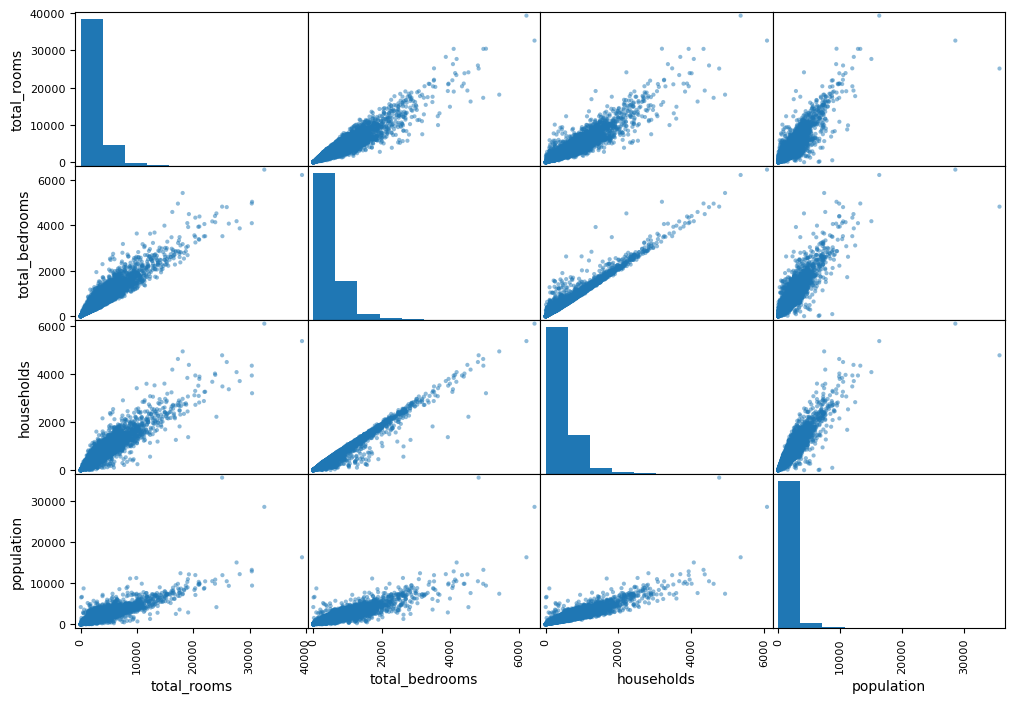

In [28]:
# Primeira dispersão por pares das variaveis com maior coeficiente de Pearson
from pandas.plotting import scatter_matrix

recursos = ["total_rooms", "total_bedrooms", "households", "population"]
scatter_matrix(strat_trainSet_copy[recursos], figsize = (12, 8))
plt.show()

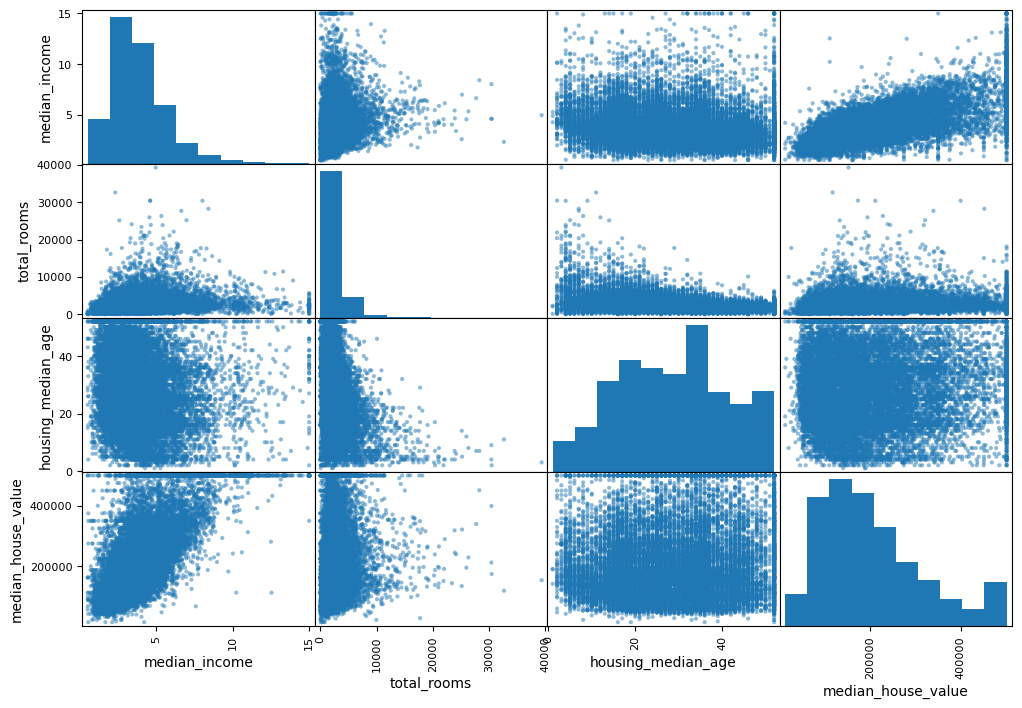

In [29]:
# Segunda dispersão por pares das variaveis com maior coeficiente de Pearson
recursos = ["median_income", "total_rooms", "housing_median_age", "median_house_value"]
scatter_matrix(strat_trainSet_copy[recursos], figsize = (12, 8))
plt.show()

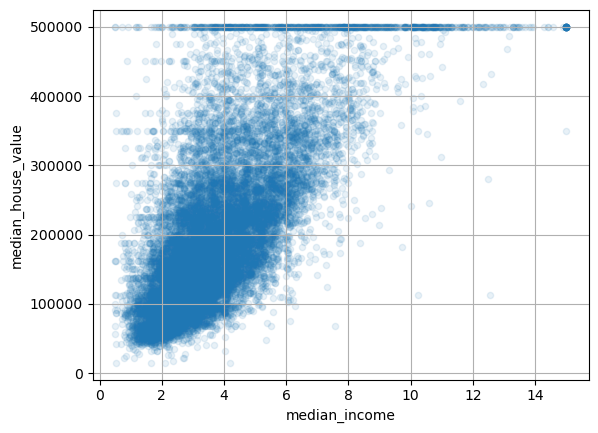

In [30]:
# Gráfico de disperssão median_income vs median_house_value

strat_trainSet_copy.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1, grid=True)
plt.show()

## Experimentar combinação de variáveis 

> Como foi mostrado no gráfico de disperssão por pares dos recursos "total_rooms", "total_bedrooms", "households", "population", essas variáveis parecem ter um relação assim:

- "total_bedrooms" e "total_rooms" 
- "total_rooms" e "households"
- "population" e "households"

In [31]:
# Transformações
strat_trainSet_copy["bedrooms_por_rooms"] = strat_trainSet_copy["total_bedrooms"] /strat_trainSet_copy["total_rooms"] 
strat_trainSet_copy["rooms_por_households"] = strat_trainSet_copy["total_rooms"] /strat_trainSet_copy["households"] 
strat_trainSet_copy["population_por_households"] = strat_trainSet_copy["population"] /strat_trainSet_copy["households"] 

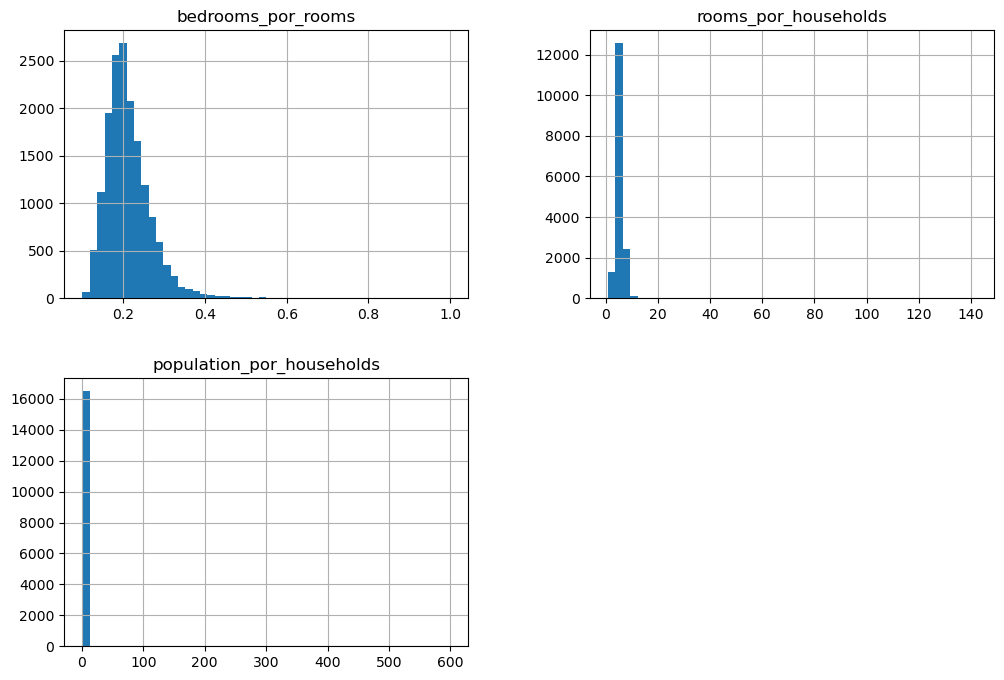

In [32]:
# histograma
strat_trainSet_copy[["bedrooms_por_rooms", "rooms_por_households", "population_por_households"]].hist(bins = 50, figsize= (12, 8))
plt.show()

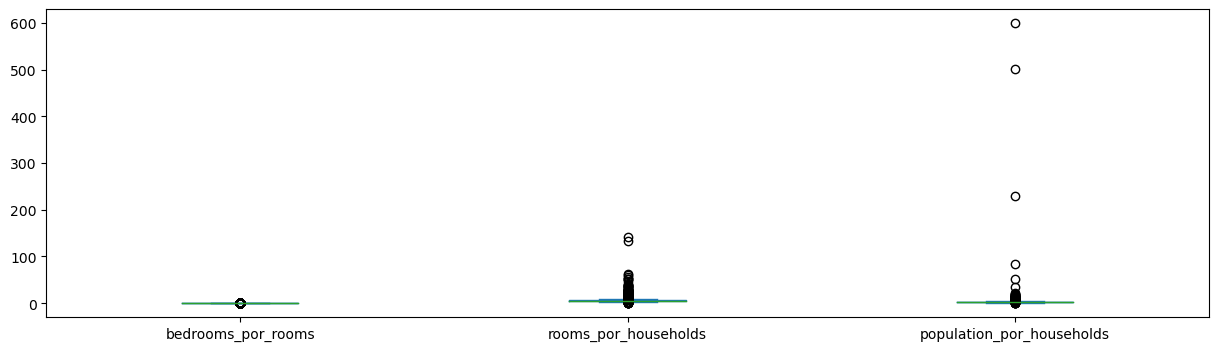

In [33]:
# Box-plot
fig, axs = plt.subplots(figsize=(15, 4))
strat_trainSet_copy[["bedrooms_por_rooms", "rooms_por_households", "population_por_households"]].plot.box(ax = axs)
plt.show()

In [34]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.692000
total_rooms           0.137011
housing_median_age    0.105656
households            0.067552
total_bedrooms        0.050802
population           -0.023418
longitude            -0.046469
latitude             -0.143823
Name: median_house_value, dtype: float64

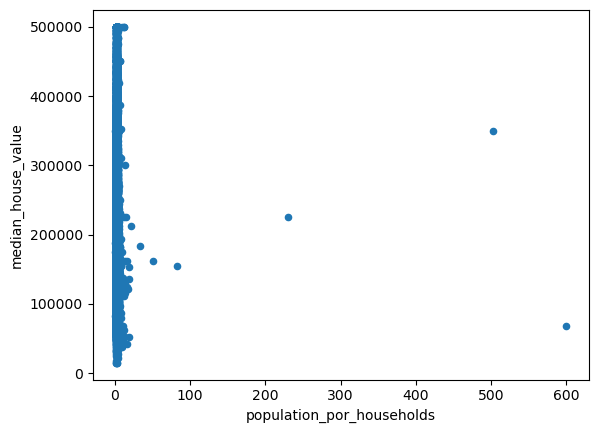

In [35]:
strat_trainSet_copy.plot.scatter(x = "population_por_households", y = "median_house_value")
plt.show()

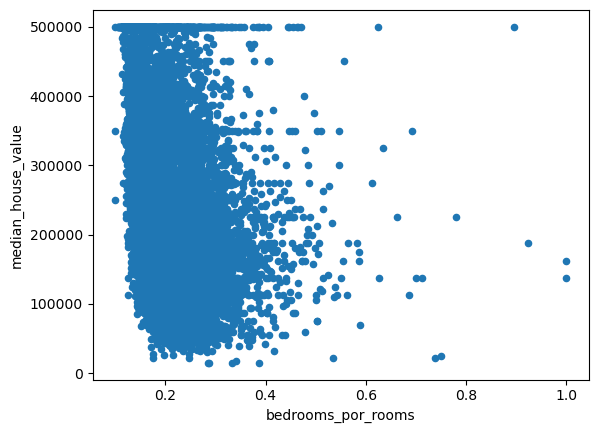

In [36]:
strat_trainSet_copy.plot.scatter(x = "bedrooms_por_rooms", y = "median_house_value")
plt.show()

## Preparação de dados para algoritmos de Machine Learning

> Se recomenda escrever funções para esse fim, por várias boas razões:
    
- Isso permitirá que se reproduza facilmente essas transformações em qualquer conjunto de dados (por exemplo, da próxima vez que você obter um conjunto de dados novo).
- Isso tornará possível em experimentar facilmente várias transformações e ver qual combinação de transformações funciona melhor.
- Construa gradualmente uma biblioteca de funções de transformação que possa reutilizar em projetos futuros.
- Essas funções em seu sistema podem ser usadas em tempo real para transformar os novos dados antes de alimentá-los aos seus algoritmos.
- O autor Aurelio reescreve o objeto `housing` que tinha o conjunto de treinamento estratíficado e no ínicio continha a base de dados. 


In [37]:
# Obtem-se de novo um conjuntro de trainamento estratificado limpo separando da meta ou target
strat_trainSet_copy = strat_trainSet.drop("median_house_value", axis = 1).copy()


In [38]:
# cria-se uma copia da meta ou target
alojamento_target = strat_trainSet.median_house_value.copy()

### Limpar os dados

Para atributos o recursos com valores ausentes como em `total_bedrooms`, tem-se três alternativas:

- Livrar-se dos distritos (registros) correspondentes.
  - housing.dropna(subset=["total_bedrooms"], inplace=True) 

- Livrar-se de todo o atributo (campo)
  - housing.drop("total_bedrooms", axis=1) 

- Definir os valores ausentes para algum valor (zero, a média, a mediana, etc.). Isso é chamado de *imputação*.
  - from sklearn.impute import SimpleImputer
  - imputer = SimpleImputer(strategy="median")

In [39]:
# Toma-se a opção 3: com a classe SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [40]:
# Selecionan apenas variáveis numéricas
alojamento_num = strat_trainSet_copy.select_dtypes(include=np.number)

In [41]:
# Obter mediana para imputar
imputer.fit(alojamento_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2124.5   ,  434.    , 1164.    ,
        409.    ,    3.5355])

In [43]:
# Continuam os valores NaN na coluna `total_bedrooms`
strat_trainSet_copy.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        159
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [44]:
# Imputar no conjunto training
X = imputer.transform(alojamento_num)

In [45]:
imputer.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [46]:
alojamento_tr = pd.DataFrame(X, columns=imputer.get_feature_names_out(),
                          index=alojamento_num.index)

In [47]:
alojamento_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4325,-117.93,33.87,52.0,950.0,229.0,429.0,185.0,2.3150
15111,-122.55,37.97,52.0,2232.0,291.0,731.0,253.0,7.1155
6286,-117.09,32.62,37.0,1925.0,428.0,1344.0,426.0,2.4866
11739,-118.02,34.05,33.0,2464.0,627.0,2932.0,568.0,3.0625
10429,-122.48,37.69,42.0,2993.0,512.0,1594.0,546.0,4.4821


In [48]:
# se verifica se a imputação foi realizada
alojamento_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Lidando com atributos de textos e categóricos

- A maioria dos algoritmos de ML trabalham com número, logo atributos categóricos devem ser discretizados. 

In [49]:
# primeitos 10 dados do atributo `ocean_proximity`
ocean_proximity_cat = strat_trainSet_copy[["ocean_proximity"]]
ocean_proximity_cat.head(10)



,ocean_proximity
4325,<1H OCEAN
15111,NEAR BAY
6286,NEAR OCEAN
11739,<1H OCEAN
10429,NEAR OCEAN
11735,NEAR OCEAN
20635,INLAND
10596,<1H OCEAN
7886,<1H OCEAN
16407,NEAR OCEAN


In [50]:
# contagem dos níveis do atributo `ocean_proximity`
ocean_proximity_cat.value_counts()

ocean_proximity
<1H OCEAN          7297
INLAND             5239
NEAR OCEAN         2111
NEAR BAY           1862
ISLAND                3
dtype: int64

In [51]:
# Discretização do atributo `ocean_proximity`
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ocean_proximity_encoded = ordinal_encoder.fit_transform(ocean_proximity_cat)

In [52]:
ocean_proximity_encoded[:10]

array([[0.],
       [3.],
       [4.],
       [0.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [4.]])

In [53]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> No entanto, o atributo `ocean_proximity` são é uma variável categórica ordinal. De fato, seu nível `<1H OCEAN` está mais próximo de `NEAR OCEAN` de  `INLAND`. Em poucas palavras na discretização o nível `0` está mais próximo de `4` do que de `1`, mas o software interpretará que `0` é mais próxim do `1` do que `4`, o que seria um erro. Assim, se criam variável dicotómica para cada nível da variável nominal  `ocean_proximity`, isso é chamado de *one - hot*. 

In [54]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
ocean_proximity_1hot = cat_encoder.fit_transform(ocean_proximity_cat)

In [55]:
ocean_proximity_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Padronização e Transformação de Recursos

- Em geral, os algoritmos de *ML* não têm um bom desempenho quando os atributos numéricos de entrada têm escalas muito diferentes.

- Existem duas maneiras comuns de fazer com que todos os atributos tenham a mesma escala: a padronização mínima-máxima (minmax scaling) e a padronização (standardization).A primeira é mais afetada por valores discrepantes. 

#### Aviso

- Assim como todos os estimadores, é importante ajustar os escaladores apenas aos dados de treinamento: nunca use `fit()` ou `fit_transform()` para qualquer outra coisa que não seja o conjunto de treinamento. 

- Depois de ter um escalador treinado, você pode usá-lo para transformar qualquer outro conjunto de dados, incluindo o conjunto de validação, o conjunto de teste e novos dados. 

- Observe que, embora os valores do conjunto de treinamento sempre sejam escalados para a faixa especificada, se novos dados contiverem valores discrepantes, eles podem acabar sendo escalados fora da faixa. Se você quiser evitar isso, basta definir o hiperparâmetro clip como True.

#### Abordagem

- Se algum recurso numérico tem caudas pesadas (ou seja, uma concentração significativa de pontos extremos),  tanto a escala min-máx quanto a padronização irão comprimir a maioria dos valores em uma faixa pequena. Nesse caso, faça o seguinte: 

    - Transformá-lo para reduzir a cauda pesada e, se possível, tornar a distribuição aproximadamente simétrica.
        -  Se o recurso positivo tem uma cauda pesada para a direita se sustitui a característica por sua raiz quadrada (ou elevar a característica a uma potência *entre* 0 e 1).
        - Se o recurso tiver uma cauda realmente longa e pesada, como uma distribuição de lei de potência, substituí-la pelo seu logaritmo.
        - Se o recurso tiver um distribuição multimodal se pode usar a medida de similariedade radial basis function (RBF)
    - Padronize o recurso (dimensione o recurso).

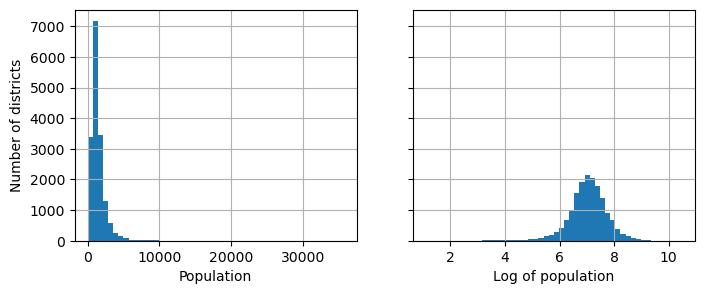

In [56]:
# Transformação logaritmo do recurso população
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
strat_trainSet_copy["population"].hist(ax=axs[0], bins=50)
strat_trainSet_copy["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

In [57]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(strat_trainSet_copy[["housing_median_age"]], [[35]], gamma=0.1)

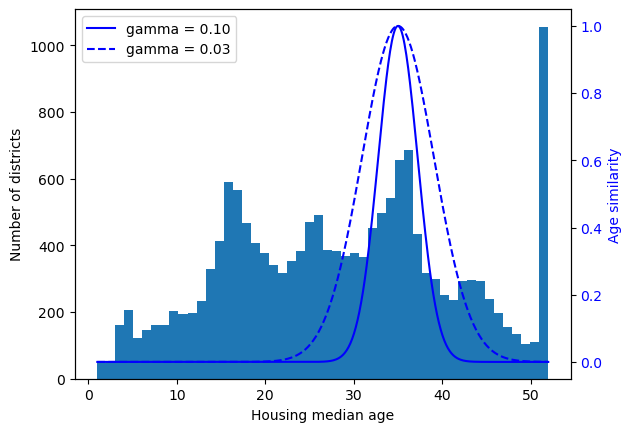

In [58]:
# transformacao medida de similariedade radial basis function (RBF)

ages = np.linspace(strat_trainSet_copy["housing_median_age"].min(),
                   strat_trainSet_copy["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(strat_trainSet_copy["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

### Transformações Pipelines

- Como mostrado anteriormente, existem muitos passos de transformações de dados que precisam ser executadas na ordem correta. 

- Scikit-Learn fornece a classe `Pipeline` para ajudar com sequências de transformações desse tipo. 

O código que realiza o pré-processamento dos dados cumpre as seguintes atividades:

- Nas colunas numéricas, imputação dos `NaN`pela mediana. 
- Nas colunas categóricas, imputação dos `NaN` pelo nível mais frequente. 
- Discretização ou codificação da variável nominal de interesse, considerando variáveis dicotómicas através do processo *onehot*.
- Adiciona-se novos recursos (indicadores) que são mais úteis, com uma correlação maior com a *Target*.
- Introduz-se um cluster para remplazar os recursos de localização, pois pode ser mais úteis. 
- Recursos com uma cauda longa e pesada serão substituídos pelo seu logaritmo, pois a maioria dos modelos prefere recursos com distribuições aproximadamente uniformes ou gaussianas.
- Todas as características numéricas serão padronizadas, pois a maioria dos algoritmos de ML prefere que todas as características tenham aproximadamente a mesma escala.

In [59]:
# Objeto alojamento
alojamento = strat_trainSet_copy # a mesma copia feita

In [60]:
strat_trainSet_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4325,-117.93,33.87,52.0,950.0,229.0,429.0,185.0,2.3150,<1H OCEAN
15111,-122.55,37.97,52.0,2232.0,291.0,731.0,253.0,7.1155,NEAR BAY
6286,-117.09,32.62,37.0,1925.0,428.0,1344.0,426.0,2.4866,NEAR OCEAN
11739,-118.02,34.05,33.0,2464.0,627.0,2932.0,568.0,3.0625,<1H OCEAN
10429,-122.48,37.69,42.0,2993.0,512.0,1594.0,546.0,4.4821,NEAR OCEAN


In [61]:
# Importar funções
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute   import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose  import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.compose  import TransformedTargetRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.utils.validation import check_array, check_is_fitted

In [62]:
# Parche para obter get_feature_names_out()

def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

**Opção 1: transformação de pipeline (sem concatenação das transformações)**:

In [63]:
# Variável numérica: imputação, transformação log, e padronização
imputer_log_scaler_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                                            FunctionTransformer(np.log),
                                            StandardScaler())

variaveis_num01 = alojamento[['median_income', 'housing_median_age']]
variaveis_trans01 = imputer_log_scaler_pipeline.fit_transform(variaveis_num01)

In [64]:
# Variável numérica: imputação, criação de indicadores e transformação log e padronização
def indicadores_numericos(X):
    return X[:, [0]] / X[:, [1]]

imputer_translog_scaler_pipeline = make_pipeline(SimpleImputer(strategy = "median"), 
                                                 FunctionTransformer(indicadores_numericos),                                   
                                                 FunctionTransformer(np.log),
                                                 StandardScaler())

variaveis_num02 = alojamento[['total_bedrooms', 'total_rooms']]
variaveis_num03 = alojamento[['total_rooms', 'households']]
variaveis_num04 = alojamento[['population', 'households']]

variaveis_trans02 = imputer_translog_scaler_pipeline.fit_transform(variaveis_num02)
variaveis_trans03 = imputer_translog_scaler_pipeline.fit_transform(variaveis_num03)
variaveis_trans04 = imputer_translog_scaler_pipeline.fit_transform(variaveis_num04)


In [65]:
# Variável distribuição multinomial: imputação, medida de similharidade Gaussiana RBF e padronização
variaveis_num06 = alojamento[["housing_median_age"]]

transforma_rbf = make_pipeline(SimpleImputer(strategy="median"),
                              FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1)))
variaveis_trans06 = transforma_rbf.fit_transform(variaveis_num06)

In [66]:
# Variável categoría: imputação e processo one-hot
variaveis_cat07 = alojamento[["ocean_proximity"]]
imputer_onehote = make_pipeline(SimpleImputer(strategy = "most_frequent"),
                                OneHotEncoder(handle_unknown="ignore"))

variaveis_trans07 = imputer_onehote.fit_transform(variaveis_cat07)

In [67]:
# cluster de variaveis
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
semelhantes = cluster_simil.fit_transform(alojamento[["latitude", "longitude"]],
                                           sample_weight=alojamento_target)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Opção 2: transformação de pipeline direta (com contaneação das variáveis)**:

> Variaveis orginais e pré-processamento requerido:

    - ['median_income']                  # Variáveis para imputação, transformação log, e padronização
    - ['total_bedrooms', 'total_rooms']  # variáveis para imputação, indicadores, transformação log e patronização
    - ['total_rooms', 'households']      # variáveis para imputação, indicadores, transformação log e patronização
    - ['population', 'households']       # variáveis para imputação, indicadores, transformação loge patronização
    - ["latitude", "longitude"]          # variáveis para imputação e clusterização
    - ["housing_median_age"]             # variáveis para imputação, e padronização 
    - ["ocean_proximity"]                # variáveis para imputação, discrezitação one-hot

In [68]:
# imputação, criação de indicadores e transformação log e padronização
def indicadores_numericos(X):
    return np.log(X[:, [0]] / X[:, [1]]) 

def nome_indicador(function_transformer, feature_names_in):
    return ["ratio"]  # nome de saida do recurso

def indicador_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(indicadores_numericos, feature_names_out=nome_indicador),
        StandardScaler())

# imputação, transformação log, e padronização
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

# variável numérica: clusterização

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
    
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # sempre retorne self!
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Similaridade com o Cluster {i}" for i in range(self.n_clusters)]
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# Imputar e discretizar
cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"),
                                OneHotEncoder(handle_unknown="ignore"))


# Variável distribuição multinomial: imputação, medida de similharidade Gaussiana RBF e padronização
transforma_rbf = make_pipeline(SimpleImputer(strategy="median"),
                               FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1), feature_names_out="one-to-one"))

# variável numérica: imputação e padronização
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

# pré-processamento dos dados
pre_processamento = ColumnTransformer([
        ("log_bedrooms_por_rooms", indicador_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("log_rooms_por_house", indicador_pipeline(), ["total_rooms", "households"]),
        ("log_people_por_house", indicador_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
        ("scaler", default_num_pipeline, ["housing_median_age"]), 
    ])  # one column remaining: housing_median_age

In [69]:
# Aplicando a transformação nos dados
alojamento_preparado = pre_processamento.fit_transform(alojamento)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
# dimensiones 
print(alojamento_preparado.shape)

(16512, 24)


In [71]:
pre_processamento.get_feature_names_out()

array(['log_bedrooms_por_rooms__ratio', 'log_rooms_por_house__ratio',
       'log_people_por_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Similaridade com o Cluster 0',
       'geo__Similaridade com o Cluster 1',
       'geo__Similaridade com o Cluster 2',
       'geo__Similaridade com o Cluster 3',
       'geo__Similaridade com o Cluster 4',
       'geo__Similaridade com o Cluster 5',
       'geo__Similaridade com o Cluster 6',
       'geo__Similaridade com o Cluster 7',
       'geo__Similaridade com o Cluster 8',
       'geo__Similaridade com o Cluster 9',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'scaler__housing_median_age'],
      dtype=object)

In [72]:
# Converter para um DataFrame Pandas
df_train_preparado = pd.DataFrame(
    alojamento_preparado, columns=pre_processamento.get_feature_names_out(),
    index=alojamento.index)

df_train_preparado


,log_bedrooms_por_rooms__ratio,log_rooms_por_house__ratio,log_people_por_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Similaridade com o Cluster 0,geo__Similaridade com o Cluster 1,...,geo__Similaridade com o Cluster 6,geo__Similaridade com o Cluster 7,geo__Similaridade com o Cluster 8,geo__Similaridade com o Cluster 9,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,scaler__housing_median_age
4325,0.617002,-0.043779,-0.753682,-0.838525,-1.020089,-1.293626,-1.029836,-0.861294,6.817781e-01,2.606199e-14,...,1.953841e-02,1.500441e-01,1.260973e-16,2.559128e-11,1.0,0.0,0.0,0.0,0.0,1.853181
15111,-1.818982,1.926628,0.064512,-0.510601,0.113973,-0.574632,-0.603598,1.520825,2.259422e-19,7.105692e-01,...,1.515139e-08,1.726090e-25,7.804385e-02,8.656464e-02,0.0,0.0,0.0,1.0,0.0,1.853181
6286,0.296672,-0.509345,0.391689,0.017413,-0.082481,0.246938,0.105883,-0.709595,1.359353e-01,2.262247e-22,...,9.062015e-06,9.204368e-01,1.588867e-25,9.630181e-19,0.0,0.0,0.0,0.0,1.0,0.661742
11739,0.831611,-0.657982,2.223421,0.539985,0.245261,1.299256,0.497602,-0.267662,6.183748e-01,2.016565e-13,...,3.679123e-02,8.494723e-02,1.358728e-15,1.718434e-10,1.0,0.0,0.0,0.0,0.0,0.344025
10429,-0.742379,0.194008,0.103051,0.262672,0.503474,0.477084,0.443814,0.540319,3.961178e-18,8.687779e-01,...,1.177249e-07,5.991842e-24,5.053867e-02,1.127729e-01,0.0,0.0,0.0,0.0,1.0,1.058888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,-1.120988,0.737076,-0.029837,-0.170834,0.209767,-0.070762,-0.060501,1.162402,1.731513e-01,5.858042e-11,...,2.292540e-01,1.112965e-02,1.982700e-13,1.301670e-08,1.0,0.0,0.0,0.0,0.0,0.105737
722,-0.234215,-0.138081,-0.549111,-0.702118,-0.602642,-0.760323,-0.566436,0.473827,4.026648e-01,3.160923e-12,...,9.194749e-02,3.607925e-02,1.864451e-14,1.594833e-09,1.0,0.0,0.0,0.0,0.0,1.535464
658,-0.105722,-0.518143,-0.772714,-0.832562,-0.772220,-0.872902,-0.598226,0.015620,1.043342e-16,9.777935e-01,...,8.898560e-07,2.632896e-22,5.299521e-02,1.927219e-01,0.0,0.0,0.0,0.0,1.0,1.138317
5190,-0.167378,0.110909,0.959791,0.067643,0.121683,0.430590,0.083323,0.189303,5.763795e-01,2.284925e-13,...,4.025175e-02,8.363177e-02,1.268056e-15,1.717392e-10,1.0,0.0,0.0,0.0,0.0,0.741171


Verificação:

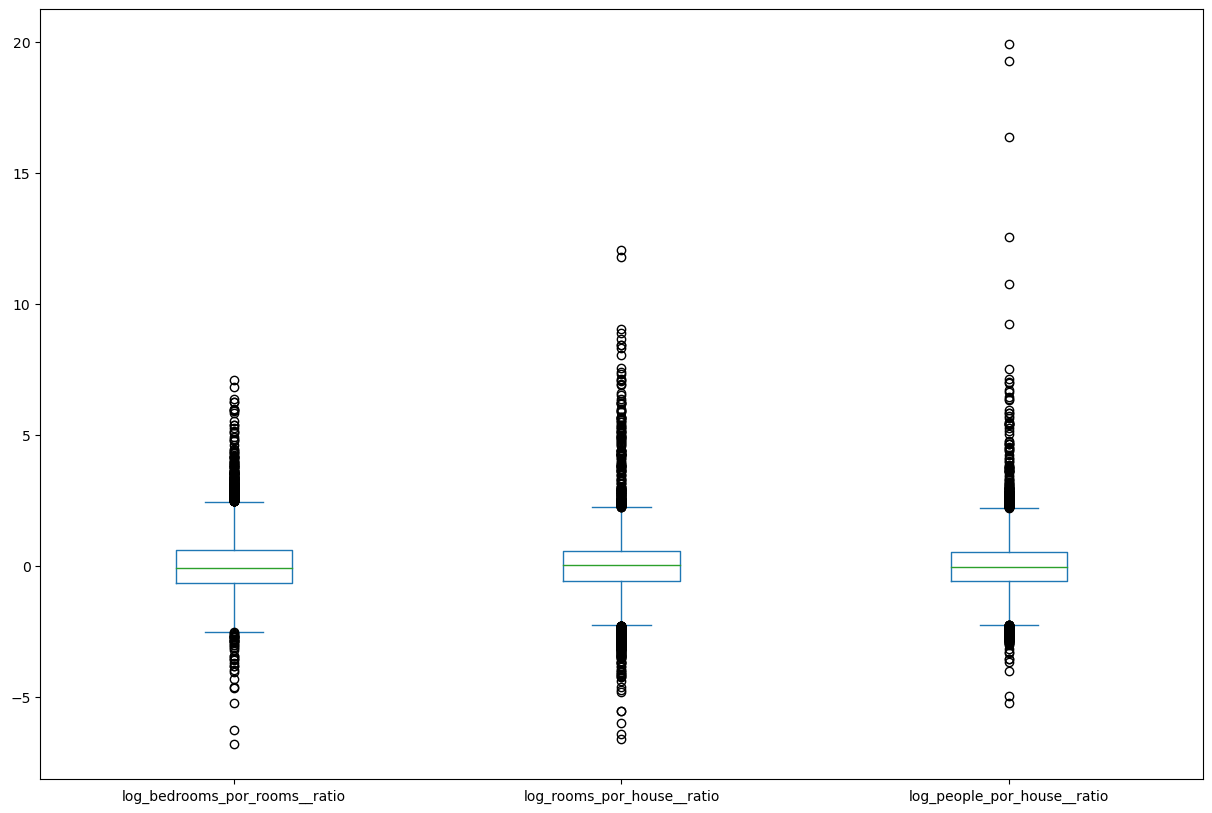

In [73]:
# box-plot
fig, axs = plt.subplots(figsize=(15, 10))
df_train_preparado[['log_bedrooms_por_rooms__ratio', 'log_rooms_por_house__ratio',
       'log_people_por_house__ratio']].plot.box(ax=axs)                   
plt.show()  


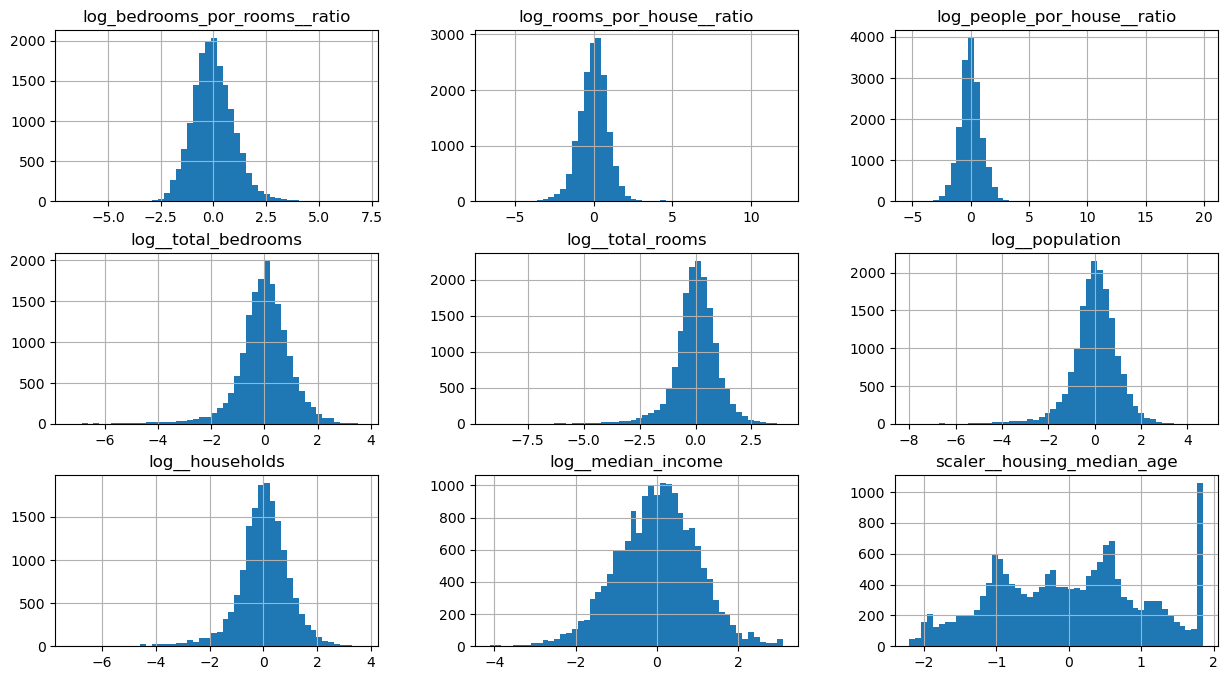

In [74]:
# histogramas
df_train_preparado[['log_bedrooms_por_rooms__ratio', 'log_rooms_por_house__ratio',
       'log_people_por_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'scaler__housing_median_age']].hist(bins = 50, figsize=(15, 8))
plt.show()

# Selecionar e Treinar um Modelo

O objeto `alojamento` é o conjunto training sem a meta

In [75]:
# Ajustar modelo de regressão linear
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(pre_processamento, LinearRegression())
lin_reg.fit(alojamento, alojamento_target)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log_bedrooms_por_rooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function nome_indicador at 0x0000026C39C0C3A0>,
                                                                                       func=<function indicadores_numericos at 0x0000026C39C0C310>)),
                                                                  ('standardscaler',
                                                                   Stand...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C3A29A4F0>),
                                                 ('scaler',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('linearregression', LinearRegression())])

In [76]:
# Cinco primeiras previsões
alojamento_hat = lin_reg.predict(alojamento)

print("Primeiras 5 previsões", alojamento_hat[0:5].round(2))
print("Primeiras 5 taget", alojamento_target.iloc[0:5].values.round(2))

Primeiras 5 previsões [204168. 328200. 159496. 158984. 308328.]
Primeiras 5 taget [182100. 500001. 129700. 165800. 252400.]


In [77]:
# REQM 
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(alojamento_target, alojamento_hat, squared=False)
lin_rmse.round(2)

69677.95

- Pelo resultado parece que o modelo não é satisfatório. 
- As principais formas de corrigir o ajuste insuficiente são selecionar um modelo mais poderoso, alimentar o algoritmo de treinamento com características melhores ou reduzir as restrições sobre o modelo. 
- Este modelo não é regularizado, o que elimina a última opção.
- Primiero, se ajustam outros modelos mais complexos.
- Segundo, caso a primeria opção não oferezca um modelo razoável se treina o algoritmo com otras caraterísticas melhroas. 

Ajusta-se um modelo de árvore de decisão `DecisionTreeRegressor`:

In [78]:
# Ajustar modelo de árvore de desição
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(pre_processamento, DecisionTreeRegressor(random_state=42))
tree_reg.fit(alojamento, alojamento_target)


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log_bedrooms_por_rooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function nome_indicador at 0x0000026C39C0C3A0>,
                                                                                       func=<function indicadores_numericos at 0x0000026C39C0C310>)),
                                                                  ('standardscaler',
                                                                   Stand...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C3A29A4F0>),
                                                 ('scaler',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [79]:
# Cinco primeiras previsões
alojamento_hat = tree_reg.predict(alojamento)

print("Primeiras 5 previsões", alojamento_hat[0:5].round(2))
print("Primeiras 5 taget", alojamento_target.iloc[0:5].values.round(2))

Primeiras 5 previsões [182100. 500001. 129700. 165800. 252400.]
Primeiras 5 taget [182100. 500001. 129700. 165800. 252400.]


In [80]:
# REQM 
from sklearn.metrics import mean_squared_error
tree_rmse = mean_squared_error(alojamento_target, alojamento_hat, squared=False)
tree_rmse.round(2)

0.0

> Um REQM igual a zero, pode implicar que o modelo se ajustou muito bemm aos dados, o que também é chamado de `overfitting`. Para tratar este prossível problema, se usa parte do conjunto de treinamento para treinar e parte dele para validação do modelo. O conjunto teste não se usa até estar satisfeito com o modelo. 

## Melhor Evaluação Usando Validação-Cruzado

In [81]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, alojamento, alojamento_target,
                              scoring="neg_root_mean_squared_error", cv=10)


C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\clust

In [82]:
# REQM por k-fold
pd.Series(tree_rmses)

0    66381.837807
1    65857.393005
2    64198.681911
3    65469.941477
4    66165.674749
5    63628.870016
6    68893.710926
7    66131.285040
8    68159.251008
9    67645.233829
dtype: float64

In [83]:
# REQM global
pd.Series(tree_rmses).std()

1648.5841643826966

Pode-se tentar mais um modelo:

In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(pre_processamento,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, alojamento, alojamento_target,
                                scoring="neg_root_mean_squared_error", cv=10)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\clust

In [85]:
# REQM por K-fold
pd.Series(forest_rmses)

0    47075.991950
1    45065.538262
2    50651.296593
3    46526.421177
4    45832.686223
5    45867.931492
6    46873.314060
7    46263.337111
8    49958.512937
9    48044.260213
dtype: float64

In [86]:
# REQM global
pd.Series(forest_rmses).std()

1822.2119542145397

# Aperfeiçoamento do Modelo

Para cada modelo promissoreo se faz um aperfeiçoamento. Considere que seja uma lista pequena de modelos. 

Os hiperparâmetros são parâmetros que não são aprendidos diretamente pelo modelo durante o treinamento, mas são definidos antes do treinamento e afetam o desempenho e comportamento do modelo. Exemplos comuns de hiperparâmetros incluem a taxa de aprendizado em algoritmos de otimização, a profundidade máxima de uma árvore de decisão, o número de clusters em um algoritmo de agrupamento, o tamanho do lote em uma rede neural, entre outros. 

A busca em grade (grid search) e outras técnicas de ajuste de hiperparâmetros são usadas para automatizar o processo de encontrar os melhores valores para esses parâmetros, permitindo que o modelo seja ajustado de forma mais eficiente e eficaz.

In [87]:
from sklearn.model_selection import GridSearchCV

# classe de estimadores
full_pipeline = Pipeline([
    ("pre_processamento", pre_processamento),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# grade de hiperparâmetros
param_grid = [
    {'pre_processamento__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'pre_processamento__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]

# result
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(alojamento, alojamento_target)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\clust

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\clust

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre_processamento',
                                        ColumnTransformer(transformers=[('log_bedrooms_por_rooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function nome_indicador at 0x0000026C39C0C3A0>,
                                                                                                              func=<function indicadores_numericos at 0x0000026C39C0C31...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['housing_median_age'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'pre_processamento__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'pre_processamento__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

> O código encima funciona como sigue:

    - A função `GridSearchCV`, primeiro, procura a melhor combinação de hiper-parâmetros que precisam ser otimizados no pre-processamento e nos modelos dentro da classe estimadora. No `param_grid` para cada um das combinações dos parâmetros, dadas pelo diccionário, toma a caminho dado na chave do diccionários diviendo-lo através do underline duplos. Um primeiro caminho seria, `pre_processamento`, logo encontra o transformador `ColumTransformer`, depois o estimados com o nome `geo` e logo o hiper-parâmetro `n_clusters`, o mesmo para `max_features`. E aplica a primeira combinação de de hiper-parâmetros.
        
    - Faz as transformações da classe estimadora `full_pipeline` (que contém o transformador do pré-processamento e o modelo que será ajustado) para cada um das combinações de hiper-parâmetros nos diccionários, no primeiro 3 * 3 = 9 combinações e no segundo 2 * 3 = 6 combinações, em total 15 combinações.
    
    - Logo, reliza Validação Cruzada com 3 k-fold, o que significa que treina e avalha o modelo `RandomForestRegressor` 15 * 3 = 45 vezes. Calculando o `REQM` por vez. 
    
    - O critério de seleção é aquele que oferezca a menor `REQM`.
    

In [88]:
pre_processamento

ColumnTransformer(transformers=[('log_bedrooms_por_rooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function nome_indicador at 0x0000026C39C0C3A0>,
                                                                      func=<function indicadores_numericos at 0x0000026C39C0C310>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'tot...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C3A29A4F0>),
                                ('scaler',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['housing_median_age'])])

In [89]:
# Melhor combinação de hiper-parâmetros
grid_search.best_params_

{'pre_processamento__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [90]:
# Melhores estimadores
grid_search.best_estimator_

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('log_bedrooms_por_rooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function nome_indicador at 0x0000026C39C0C3A0>,
                                                                                       func=<function indicadores_numericos at 0x0000026C39C0C310>)),
                                                                  ('standardscaler',
                                                                   Stand...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026C3BF74850>),
                                                 ('scaler',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [91]:
pd.DataFrame(grid_search.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_pre_processamento__geo__n_clusters',
       'param_random_forest__max_features', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [92]:
# Resultado da `GridSearchCV` por combinação
cv_res = pd.DataFrame(grid_search.cv_results_).sort_values(by = "mean_test_score", ascending=False)
cv_res = cv_res[["param_pre_processamento__geo__n_clusters",
                "param_random_forest__max_features",
                "split0_test_score", "split1_test_score",
                "split2_test_score", "mean_test_score"]]
score_cols = ["k-fold0", "k-fold1", "k-fold2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()


,n_clusters,max_features,k-fold0,k-fold1,k-fold2,mean_test_rmse
12,15,6,44528,43230,44829,44196
13,15,8,44853,43767,45292,44637
14,15,10,45341,44243,45607,45064
7,10,6,45471,44179,46106,45252
9,10,6,45471,44179,46106,45252


> Como `15` é o valor máximo que foi avaliado para n_clusters, você provavelmente deveria tentar fazer a busca novamente com valores mais altos; o resultado pode continuar melhorando.

## Busca Aleatória

- A abordagem da `GridSearchCV` é adequada quando se explora um número relativamente pequeno de combinações, como no exemplo anterior. No entanto, a busca aleatória (`RandomizedSearchCV`) é frequentemente preferível, especialmente quando o espaço de busca dos hiperparâmetros é grande.

- Sua abordagem é semelhante à classe `CridSearchCV`, no entanto, avalia um número fixo de combinações, selecionando um valor aleatório para cada hiperparâmetro a cada iteração

In [93]:
# Funções
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Tentar 30 (`n_iter` × `cv`) combinações aleatória de hiperparâmetros.

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'pre_processamento__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(alojamento, alojamento_target)

C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oscar\anaconda3\lib\site-packages\sklearn\clust

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pre_processamento',
                                              ColumnTransformer(transformers=[('log_bedrooms_por_rooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function nome_indicador at 0x0000026C39C0C3A0>,
                                                                                                                    func=<function indicadores_numericos at 0x0000026C3...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'pre_processamento__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026C52DE9C10>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026C39E68730>},
                   random_state=42, scoring='neg_root_mean_squared_error')

# Analises dos melhores modelos e seus erros

- A inspecção dos melhores modelos fornecem sinais sobre que atributos ou recursos podem ser importantes para prever o *target*.



In [96]:
modelo_final = rnd_search.best_estimator_ # inclui o pré-processamento
recursos_importantes = modelo_final["random_forest"].feature_importances_
recursos_importantes.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.18, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.  , 0.  , 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.03, 0.  ,
       0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.03, 0.  , 0.  , 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [113]:
pd.DataFrame(sorted(zip(recursos_importantes, modelo_final["pre_processamento"].get_feature_names_out()),
      reverse = True), columns=["Coeficiente_Estimado", "Variável"]).head()

,Coeficiente_Estimado,Variável
0,0.183498,log__median_income
1,0.081609,cat__ocean_proximity_INLAND
2,0.073302,log_bedrooms_por_rooms__ratio
3,0.059411,log_rooms_por_house__ratio
4,0.048098,log_people_por_house__ratio


> O transformador sklearn.feature_selection.SelectFromModel pode automaticamente remover as características menos úteis para você: quando você o ajusta, ele treina um modelo (tipicamente uma floresta aleatória), analisa seu atributo feature_importances_ e seleciona as características mais úteis. Em seguida, quando você chama o método transform(), ele remove as outras características.

## Avaliar o sitema no conjunto de teste

In [137]:
# Dividir conjunto teste em Recursos ou Atributos e o Targer

X_teste = strat_testSet.drop("median_house_value", axis = 1).copy()
y_teste = strat_testSet["median_house_value"].copy()

> Se faz a predição final, o que implica fazer o pré-processamento, ajustar o modelo, realizar a previsões e calcular o indicador de desempenho REQM. 

In [138]:
final_hat = modelo_final.predict(X_teste)

In [139]:
final_reqm = mean_squared_error(y_teste, final_hat, squared=False)
print(final_reqm)

41462.66263239677


> Se podem ter os intervalos de confianças das previsões

In [141]:
from scipy import stats

confidence = 0.95
squared_errors = (final_hat - y_teste) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([39258.20075276, 43555.69375859])

Após a avaliação no conjunto de testes, você pode passar para a fase de pré-lançamento do projeto, onde você deve apresentar sua solução, documentar tudo o que foi feito, criar visualizações claras e declarações fáceis de lembrar sobre o sistema e suas limitações. É importante destacar o que você aprendeu, o que funcionou e o que não funcionou, bem como quais suposições foram feitas. Dependendo do desempenho final do sistema e das necessidades práticas, você pode decidir lançar o sistema ou realizar mais melhorias.

# Lançar, Monitorar e Manter seu Sistema.

- Se precisa preparar aa solução para a produção (por exemplo, aprimorar o código, escrever documentação e testes, etc.). 

- Se implanta o modelo no ambiente de produção. A maneira mais básica de fazer isso é simplesmente salvar o melhor modelo que treinado, transferir o arquivo para o ambiente de produção e carregá-lo. Para salvar o modelo, se pode usar a biblioteca joblib da seguinte maneira:

In [147]:
import joblib
joblib.dump(modelo_final, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Carregar e usar o modelo com quaisquer classe e funções personalizadas das quais o modelo dependente:

In [ ]:
import joblib
[...] # importe KMeans, BaseEstimator, TransformerMixin, rbf_kernel, etc.
def column_ratio(X): [...]
def ratio_name(function_transformer, feature_names_in): [...]
class ClusterSimilarity(BaseEstimator, TransformerMixin): [...]
final_model_reloaded = joblib.load("meu_modelo_california_housing.pkl")
novos_dados = [...] # alguns novos distritos para fazer previsões
previsoes = final_model_reloaded.predict(novos_dados)


## Muito obrigado por estar comigo!

### Oscar J. O. Ayala